#  Assignment: CNN-Based Image Classification Using CIFAR-100
**Total Marks: 100**

**Instructions:**
- This is a programming and analysis-based assignment.
- Use TensorFlow/Keras to build your models.
- Add appropriate comments and explanations.
- Attempt all questions. Marks are indicated.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.datasets import cifar100
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report, confusion_matrix

##  Section A: Data Exploration and Preprocessing (20 marks)

**Q1.** (5 marks) Load the CIFAR-100 dataset using `label_mode='fine'`. Print the shape of the training and test sets.

In [ ]:
# prompt: label_mode='fine'

# Q1. Load the CIFAR-100 dataset and print shapes
(x_train, y_train), (x_test, y_test) = cifar100.load_data()
print(f"Shape of training data (x_train): {x_train.shape}")
print(f"Shape of training labels (y_train): {y_train.shape}")
print(f"Shape of test data (x_test): {x_test.shape}")
print(f"Shape of test labels (y_test): {y_test.shape}")

Shape of training data (x_train): (50000, 32, 32, 3)
Shape of training labels (y_train): (50000, 1)
Shape of test data (x_test): (10000, 32, 32, 3)
Shape of test labels (y_test): (10000, 1)


**Q2.** (5 marks) Display 10 random images from the dataset with their class labels.

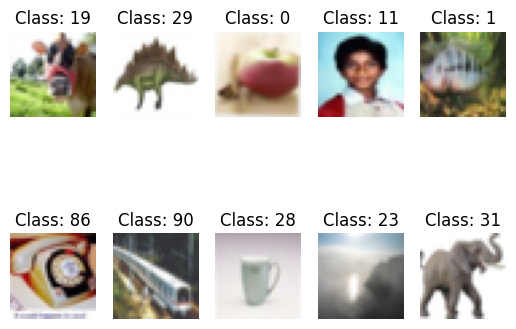

In [ ]:
# display 10 random images from training data:
for i in range(10):
  plt.subplot(2, 5, i+1)
  plt.imshow(x_train[i])
  plt.title(f"Class: {y_train[i][0]}")
  plt.axis('off')
plt.show()

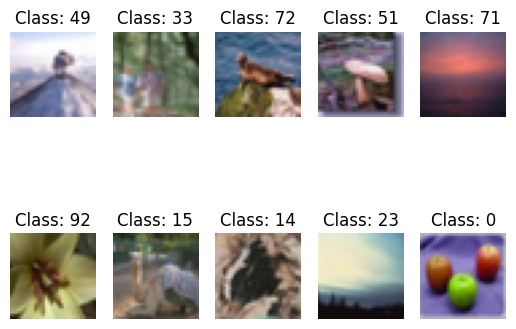

In [ ]:
for i in range(10):
  plt.subplot(2, 5, i+1)
  plt.imshow(x_test[i])
  plt.title(f"Class: {y_test[i][0]}")
  plt.axis('off')
plt.show()

**Q3.** (5 marks) Normalize the images and one-hot encode the labels. Explain why we perform both operations.

In [ ]:
# Code:
# Your code here

In [ ]:
# Normalize the pixel values to the range [0, 1]
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

In [ ]:
#first 10 labels before transformation
print("First 10 labels before transformation:", y_train[:10].flatten())

First 10 labels before transformation: [19 29  0 11  1 86 90 28 23 31]


In [ ]:
#convert label data to one-hot encoding
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [ ]:
#print 10 labels after one-hot coding:
print("First 3 labels after one-hot coding:", y_train[:3])

First 3 labels after one-hot coding: [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0.]]


**Answer:**

_we normalize images and one-hot encode labels for several reasons.
Image normalization scales pixel values to a standardized range, typically 0 to 1, improving model stability and convergence during training.

One-hot encoding converts categorical labels into a binary representation, allowing the model to interpret each class independently and avoiding biases.

**Q4.** (5 marks) What challenges do you expect when working with 100 classes instead of 10 (like CIFAR-10)?

CIFAR-100 has 60000 images. Divided aas 100 classes each class contains 600 images, 500 images for training and 100 for testing.
It requires large output layer and more perameters,more difficult to find loss function when there is more data.

##  Section B: Model Design & Training (40 marks)

**Q5.** (20 marks) Build and compile a CNN with at least two convolutional blocks and one dense output layer with 100 neurons. Use appropriate dropout and activation functions. Display the model summary.

In [ ]:
model = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(100, activation='softmax')
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


**Q6.** (15 marks) Train the model for 15–20 epochs and plot training and validation accuracy curves.

In [ ]:
# Your training code here
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
history = model.fit(x_train, y_train, batch_size=64, epochs=15, validation_split=0.2, callbacks=[early_stopping])

Epoch 1/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 55s 84ms/step - accuracy: 0.0536 - loss: 4.2436 - val_accuracy: 0.1530 - val_loss: 3.5606
Epoch 2/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 83s 86ms/step - accuracy: 0.1893 - loss: 3.3655 - val_accuracy: 0.2272 - val_loss: 3.1864
Epoch 3/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 86s 92ms/step - accuracy: 0.2540 - loss: 3.0098 - val_accuracy: 0.2553 - val_loss: 3.0187
Epoch 4/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 78s 86ms/step - accuracy: 0.2981 - loss: 2.7733 - val_accuracy: 0.2929 - val_loss: 2.8520
Epoch 5/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 81s 84ms/step - accuracy: 0.3465 - loss: 2.5648 - val_accuracy: 0.3183 - val_loss: 2.7529
Epoch 6/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 81s 82ms/step - accuracy: 0.3834 - loss: 2.3753 - val_accuracy: 0.3243 - val_loss: 2.7199
Epoch 7/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 54s 87ms/step - accuracy: 0.4141 - loss: 2.2477 - val_accuracy: 0.3365 - val_loss: 2.7012
Epoch 8/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 57s 90ms/step - accuracy: 0.4414 - loss: 2.1130 - 

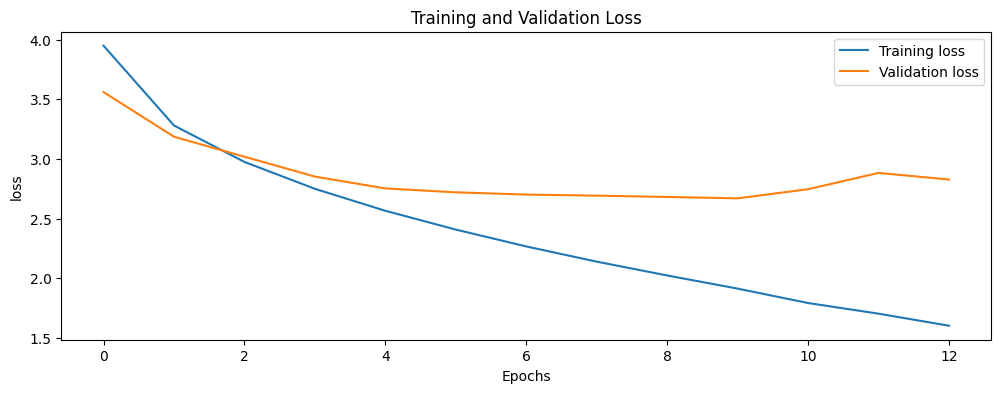

In [ ]:
plt.figure(figsize=(12, 4))
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

**Q7.** (10 marks) Report the final test accuracy. Discuss what it indicates about the model's performance.

In [ ]:
# Model evaluation code here
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_accuracy}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.3590 - loss: 2.6822
Test Accuracy: 0.3517000079154968


In [ ]:
y_pred=model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step


In [ ]:
y_pred_classes[0]

np.int64(12)

In [ ]:
print(classification_report(y_test_classes, y_pred_classes))

              precision    recall  f1-score   support

           0       0.62      0.60      0.61       100
           1       0.37      0.41      0.39       100
           2       0.22      0.29      0.25       100
           3       0.22      0.06      0.09       100
           4       0.22      0.19      0.20       100
           5       0.19      0.33      0.24       100
           6       0.40      0.38      0.39       100
           7       0.44      0.38      0.41       100
           8       0.55      0.32      0.41       100
           9       0.42      0.37      0.39       100
          10       0.14      0.11      0.12       100
          11       0.27      0.21      0.23       100
          12       0.44      0.28      0.34       100
          13       0.27      0.34      0.30       100
          14       0.33      0.31      0.32       100
          15       0.38      0.12      0.18       100
          16       0.27      0.35      0.30       100
          17       0.51    

<Axes: >

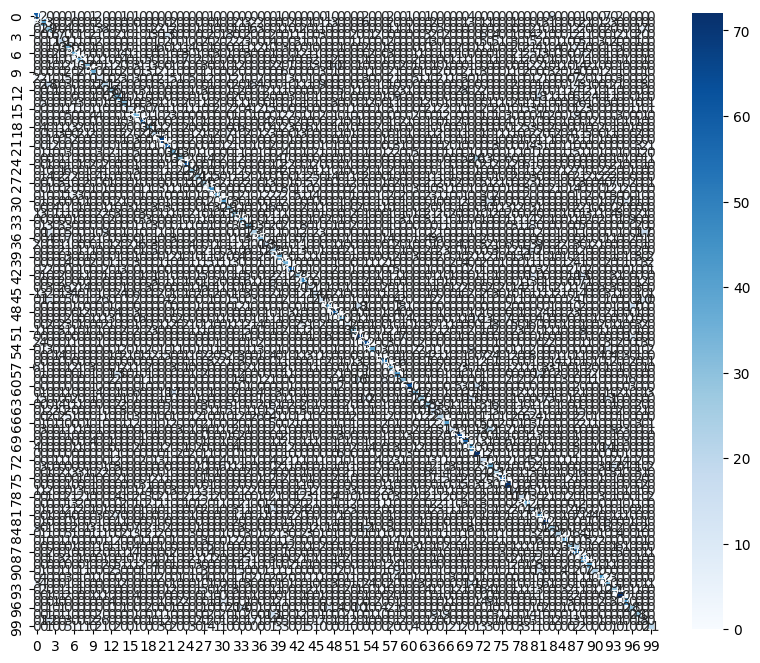

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_matrix(y_test_classes, y_pred_classes), annot=True, fmt='d', cmap='Blues')

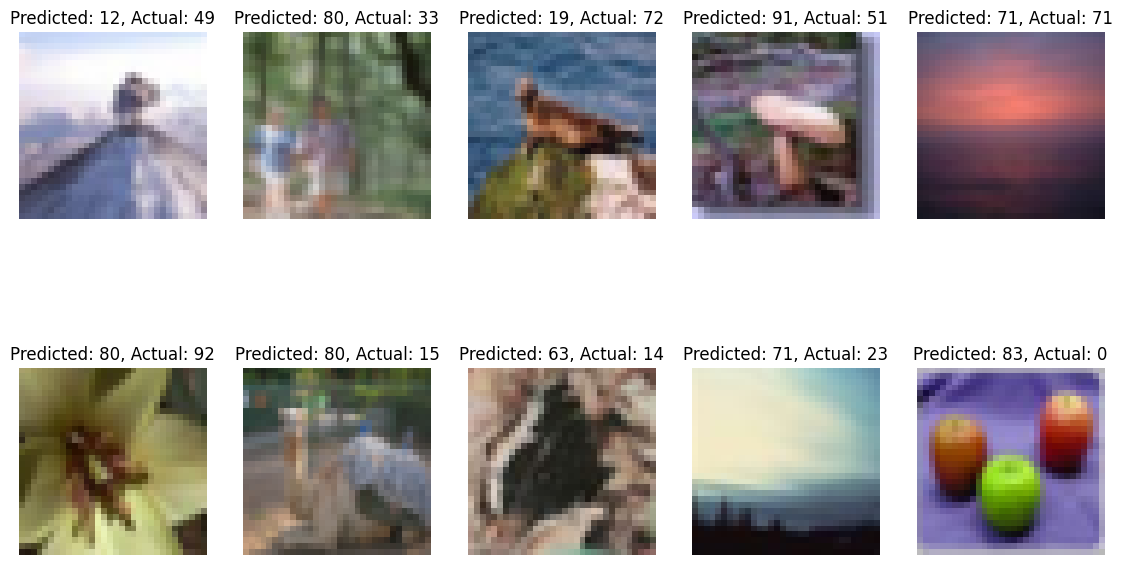

In [ ]:
plt.figure(figsize=(14, 8))
for i in range(10):
  plt.subplot(2, 5, i+1)
  plt.imshow(x_test[i])
  plt.title(f"Predicted: {y_pred_classes[i]}, Actual: {y_test_classes[i]}")
  plt.axis('off')
plt.show()

_Your explanation here_

##  Section C: Model Experimentation (20 marks)

**Q8.** (10 marks) Add one more convolutional block to the CNN. Train and compare accuracy with your previous model. Which one performs better and why?

In [ ]:
# Modified model code here

_Comparison answer here_

**Q9.** (10 marks) Use `label_mode='coarse'` and repeat training with the original model (2 conv blocks). Compare the accuracy. Explain why there's a difference.

In [ ]:
# Your code and comparison here

_Explanation here_

##  Section D: Conceptual Questions (20 marks)

**Q10.** (5 marks) Explain the role of dropout in CNNs. What could happen if we remove dropout layers?

_Your answer here_

**Q11.** (5 marks) What is the role of the softmax activation in the output layer of your CNN?


_Your answer here_

> Transforms the raw output of the network into a probability distribution over the possible classes. takes the output and converts them into vector and each vector represents which class it belongs too.



**Q12.** (5 marks) What changes would you make to the CNN architecture to improve training speed and reduce overfitting?

_Your answer here_

_Your answer here_